In [1]:
# !pip install seaborn

In [2]:
# !pip install nltk

In [3]:
# pip install spacy

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re
from nltk.corpus import stopwords 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')

In [5]:
import spacy 

In [6]:
df = pd.read_csv("UpdatedResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [7]:
df.sample(5)

,Category,Resume
238,Sales,IT Skills: MS Office. Photoshop. SQL Server.Ed...
134,Arts,â¢ Good communication skill â¢ Quick learner...
374,Java Developer,Skills â¢ Language: Java â¢ Operating System...
455,Automation Testing,* Excellent grasping power in learning new con...
761,Hadoop,"Technical Skills Programming Languages: C, C++..."


In [8]:
df.shape

(962, 2)

In [48]:
df['Category'].unique()

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int64

In [52]:
df['Category'].value_counts()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [11]:
#  DATA VISUALIZATION

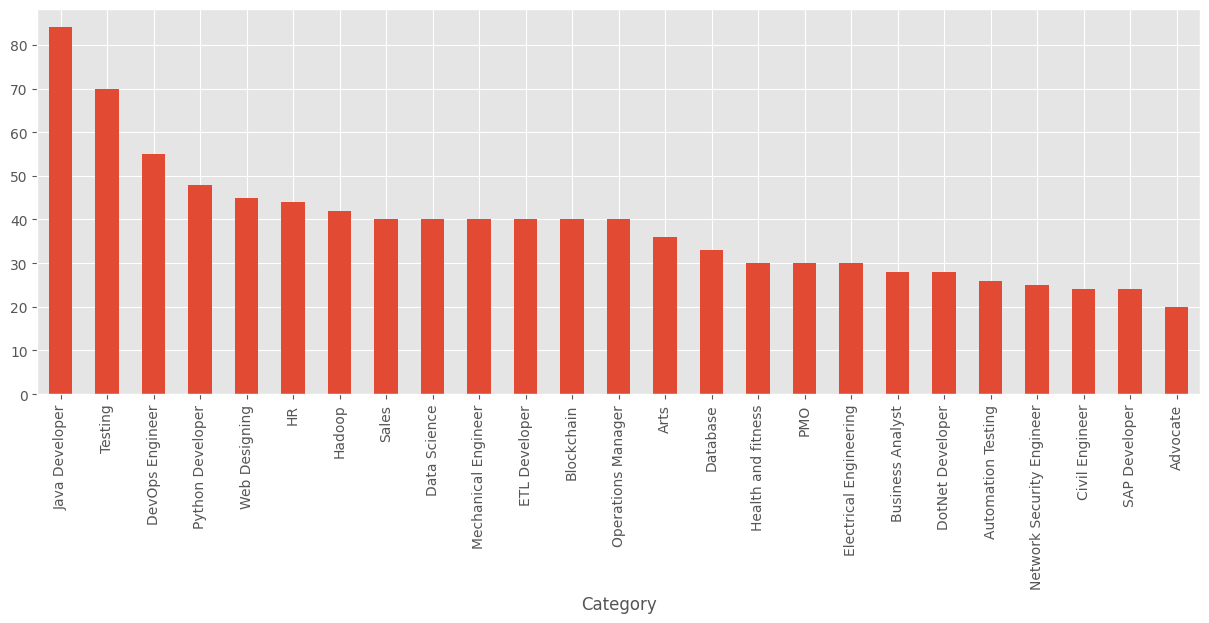

In [12]:
plt.figure(figsize=(15,5))
df['Category'].value_counts().plot(kind='bar')
plt.show()

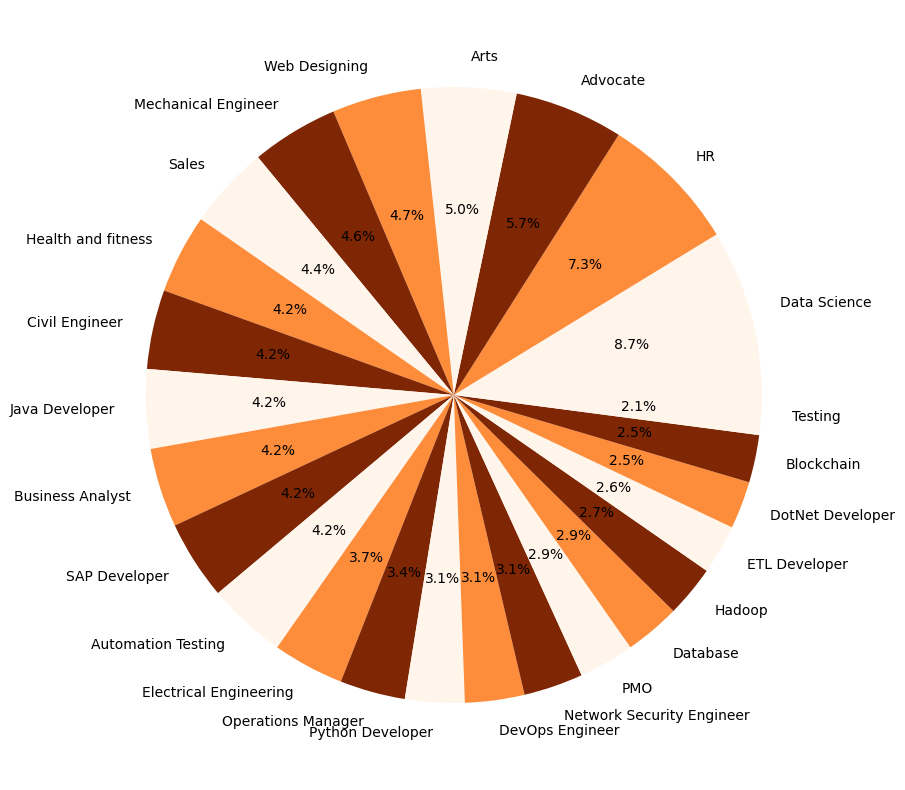

In [13]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts, labels = labels, autopct = '%1.1f%%', colors = plt.cm.Oranges(np.linspace(0,1,3)))
plt.show()

In [14]:
 # text cleaning 

In [15]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [16]:
# remove url
# remove emails
# remove special character
# remove stop words

In [17]:
# !python -m spacy download en_core_web_sm

In [18]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")



In [19]:
def clean(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}b')
    clean_text = url_pattern.sub('', text)
    clean_text = email_pattern.sub('',clean_text) 
  
    clean_text = re.sub(r'[^\w\s]', '', clean_text)
    stop_words = nlp.Defaults.stop_words
    clean_text = ' '.join(word for word in clean_text.split() if word.lower() not in stop_words)   
    return clean_text

In [20]:
s = 'Skills * ProgrJQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigations and Dispute Services   Assurance\r\nTECHNOLOGY ASSISTED REVIEW\r\nTAR (Technology Assisted Review) assists in accelerating the review process and run analytics and generate reports.\r\n* Core member of a team helped in developing automated review platform tool from scratch for assisting E discovery domain, this tool implements predictive coding and topic modelling by automating reviews, resulting in reduced labor costs and time spent during the lawyers review.\r\n* Understand the end to end flow of the solution, doing research and development for classification models, predictive analysis and mining of the information present in text data. Worked on analyzing the outputs and precision monitoring for the entire tool.\r\n* TAR assists in predictive coding, topic modelling from the evidence by following EY standards. Developed the classifier models in order to identify "red flags" and fraud-related issues.\r\n\r\nTools & Technologies: Python, scikit-learn, tfidf, word2vec, doc2vec, cosine similarity, NaÃ¯ve Bayes, LDA, NMF for topic modelling, Vader and text blob for sentiment analysis. Matplot lib, Tableau dashboard for reporting.\r\n\r\nMULTIPLE DATA SCIENCE AND ANALYTIC PROJECTS (USA CLIENTS)\r\nTEXT ANALYTICS - MOTOR VEHICLE CUSTOMER REVIEW DATA * Received customer feedback survey data for past one year. Performed sentiment (Positive, Negative & Neutral) and time series analysis on customer comments across all 4 categories.\r\n* Created heat map of terms by survey category based on frequency of words * Extracted Positive and Negative words across all the Survey categories and plotted Word cloud.\r\n* Created customized tableau dashboards for effective reporting and visualizations.\r\nCHATBOT * Developed a user friendly chatbot for one of our Products which handle simple questions about hours of operation, reservation options and so on.\r\n* This chat bot serves entire product related questions. Giving overview of tool via QA platform and also give recommendation responses so that user question to build chain of relevant answer.\r\n* This too has intelligence to build the pipeline of questions as per user requirement and asks the relevant /recommended questions.\r\n\r\nTools & Technologies: Python, Natural language processing, NLTK, spacy, topic modelling, Sentiment analysis, Word Embedding, scikit-learn, JavaScript/JQuery, SqlServer\r\n\r\nINFORMATION GOVERNANCE\r\nOrganizations to make informed decisions about all of the information they store. The integrated Information Governance portfolio synthesizes intelligence across unstructured data sources and facilitates action to ensure organizations are best positioned to counter information risk.\r\n* Scan data from multiple sources of formats and parse different file formats, extract Meta data information, push results for indexing elastic search and created customized, interactive dashboards using kibana.\r\n* Preforming ROT Analysis on the data which give information of data which helps identify content that is either Redundant, Outdated, or Trivial.\r\n* Preforming full-text search analysis on elastic search with predefined methods which can tag as (PII) personally identifiable information (social security numbers, addresses, names, etc.) which frequently targeted during cyber-attacks.\r\nTools & Technologies: Python, Flask, Elastic Search, Kibana\r\n\r\nFRAUD ANALYTIC PLATFORM\r\nFraud Analytics and investigative platform to review all red flag cases.\r\nâ\x80¢ FAP is a Fraud Analytics and investigative platform with inbuilt case manager and suite of Analytics for various ERP systems.\r\n* It can be used by clients to interrogate their Accounting systems for identifying the anomalies which can be indicators of fraud by running advanced analytics\r\nTools & Technologies: HTML, JavaScript, SqlServer, JQuery, CSS, Bootstrap, Node.js, D3.js, DC.js'

In [21]:
clean(s)

'Skills ProgrJQuery Machine learning Regression SVM NaÃve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists accelerating review process run analytics generate reports Core member team helped developing automated review platform tool sc

In [22]:
df['resume'] = df['Resume'].apply(lambda x:clean(x))

In [23]:
df['resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM NaÃve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists accelerating review process run analytics 

In [24]:
#  Encoding 

In [25]:
le = LabelEncoder()
le.fit(df[['Category']])
df['Category'] = le.transform(df['Category'])

C:\Users\91797\OneDrive\Desktop\AI ML PRACTICES\venv\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [27]:
tfidf = TfidfVectorizer()
tfidf.fit(df['Resume'])
Resume = tfidf.transform(df['Resume'])

In [28]:
Resume

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 186901 stored elements and shape (962, 7599)>

In [29]:
#  train test split


In [30]:
x_train,x_test,y_train,y_test = train_test_split(Resume, df['Category'], test_size = 0.23, random_state = 42)

In [31]:
x_test, y_test

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 44528 stored elements and shape (222, 7599)>,
 344    15
 381    15
 351    15
 778    13
 277    14
        ..
 837     9
 365    15
 422     4
 97      0
 580    20
 Name: Category, Length: 222, dtype: int64)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)

In [33]:
accuracy

0.972972972972973

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [37]:
models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression' : LogisticRegression(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'SVC' : SVC(),
    'MultinomialNB' : MultinomialNB(),
    'OneVsRestClassifier': OneVsRestClassifier(KNeighborsClassifier())


}

In [38]:
accuracy_scores = { }

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy
    print(f"accuracy of {model_name} on test data: {accuracy}")

accuracy of KNeighborsClassifier on test data: 0.972972972972973
accuracy of LogisticRegression on test data: 0.9954954954954955
accuracy of RandomForestClassifier on test data: 0.9864864864864865
accuracy of SVC on test data: 0.9954954954954955
accuracy of MultinomialNB on test data: 0.9234234234234234
accuracy of OneVsRestClassifier on test data: 0.972972972972973


In [39]:


model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)

In [40]:
accuracy

0.9954954954954955

In [45]:
myresume = """Skills * ProgrJQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigations and Dispute Services   Assurance\r\nTECHNOLOGY ASSISTED REVIEW\r\nTAR (Technology Assisted Review) assists in accelerating the review process and run analytics and generate reports.\r\n* Core member of a team helped in developing automated review platform tool from scratch for assisting E discovery domain, this tool implements predictive coding and topic modelling by automating reviews, resulting in reduced labor costs and time spent during the lawyers review.\r\n* Understand the end to end flow of the solution, doing research and development for classification models, predictive analysis and mining of the information present in text data. Worked on analyzing the outputs and precision monitoring for the entire tool.\r\n* TAR assists in predictive coding, topic modelling from the evidence by following EY standards. Developed the classifier models in order to identify "red flags" and fraud-related issues.\r\n\r\nTools & Technologies: Python, scikit-learn, tfidf, word2vec, doc2vec, cosine similarity, NaÃ¯ve Bayes, LDA, NMF for topic modelling, Vader and text blob for sentiment analysis. Matplot lib, Tableau dashboard for reporting.\r\n\r\nMULTIPLE DATA SCIENCE AND ANALYTIC PROJECTS (USA CLIENTS)\r\nTEXT ANALYTICS - MOTOR VEHICLE CUSTOMER REVIEW DATA * Received customer feedback survey data for past one year. Performed sentiment (Positive, Negative & Neutral) and time series analysis on customer comments across all 4 categories.\r\n* Created heat map of terms by survey category based on frequency of words * Extracted Positive and Negative words across all the Survey categories and plotted Word cloud.\r\n* Created customized tableau dashboards for effective reporting and visualizations.\r\nCHATBOT * Developed a user friendly chatbot for one of our Products which handle simple questions about hours of operation, reservation options and so on.\r\n* This chat bot serves entire product related questions. Giving overview of tool via QA platform and also give recommendation responses so that user question to build chain of relevant answer.\r\n* This too has intelligence to build the pipeline of questions as per user requirement and asks the relevant /recommended questions.\r\n\r\nTools & Technologies: Python, Natural language processing, NLTK, spacy, topic modelling, Sentiment analysis, Word Embedding, scikit-learn, JavaScript/JQuery, SqlServer\r\n\r\nINFORMATION GOVERNANCE\r\nOrganizations to make informed decisions about all of the information they store. The integrated Information Governance portfolio synthesizes intelligence across unstructured data sources and facilitates action to ensure organizations are best positioned to counter information risk.\r\n* Scan data from multiple sources of formats and parse different file formats, extract Meta data information, push results for indexing elastic search and created customized, interactive dashboards using kibana.\r\n* Preforming ROT Analysis on the data which give information of data which helps identify content that is either Redundant, Outdated, or Trivial.\r\n* Preforming full-text search analysis on elastic search with predefined methods which can tag as (PII) personally identifiable information (social security numbers, addresses, names, etc.) which frequently targeted during cyber-attacks.\r\nTools & Technologies: Python, Flask, Elastic Search, Kibana\r\n\r\nFRAUD ANALYTIC PLATFORM\r\nFraud Analytics and investigative platform to review all red flag cases.\r\nâ\x80¢ FAP is a Fraud Analytics and investigative platform with inbuilt case manager and suite of Analytics for various ERP systems.\r\n* It can be used by clients to interrogate their Accounting systems for identifying the anomalies which can be indicators of fraud by running advanced analytics\r\nTools & Technologies: HTML, JavaScript, SqlServer, JQuery, CSS, Bootstrap, Node.js, D3.js, DC.js"""

In [54]:
clean_resume = clean(myresume)
input_feature = tfidf.transform([clean_resume])
prediction_id = model.predict(input_feature)[0]
category_map = {
    6 : 'Data Science',
    12 : 'HR',
    0 : 'Advocate', 
    1 : 'Arts', 
    24 : 'Web Designing',
    16 : 'Mechanical Engineer',
    22 : 'Sales',
    14 : 'Health and fitness',
    5 : 'Civil Engineer',
    15 : 'Java Developer',
    4 : 'Business Analyst',
    21 : 'SAP Developer',
    2 : 'Automation Testing',
    11 : 'Electrical Engineering',
    18 : 'Operations Manager',
    20 : 'Python Developer', 
    8 : 'DevOps Engineer',
    17 : 'Network Security Engineer',
    19 : 'PMO',
    7 : 'Database',
    13 : 'Hadoop',
    10 : 'ETL Developer',
    9 : 'DotNet Developer',
    3 : 'Blockchain', 
    23 : 'Testing'
}
category_name = category_map.get(prediction_id, "UNKNOWN")
print(category_name)

Data Science


In [57]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))